# Time series prediction using LSTM

## Dataset
- Daily minimum temperatures in Melbourne, Australia, 1981-1990
- Units: Degrees Celcius

## Question 1

### Load the data
- load daily-minimum-temperatures-in-me.csv

In [16]:
# if you are using google colab
#from google.colab import files
#files.upload()

In [17]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras

Using TensorFlow backend.


In [18]:
import os
os.getcwd()

'C:\\Users\\rachit\\Desktop\\AIML Final\\AIML\\Residency-9\\Internal Lab'

In [19]:
df=pd.read_csv("daily-minimum-temperatures-in-me.csv")

# Print the data
- First 5 rows only

In [20]:
df.head()

,Date,Temperature
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


In [48]:
df.shape

(3650, 1)

### Set index column
- Set the DataFrame index using "Date" column

In [21]:
df.set_index('Date',inplace=True)

In [22]:
df.head(n=2)

,Temperature
Date,
1981-01-01,20.7
1981-01-02,17.9


## Question 2

### Check the total count of null values in the data

In [23]:
print(df.isnull().any(axis=1).sum())

0


### Drop all the rows with null values
- use dropna() method

In [24]:
df.dropna(inplace=True)

In [25]:
df.shape

(3650, 1)

In [26]:
df.head(n=2)

,Temperature
Date,
1981-01-01,20.7
1981-01-02,17.9


## Question 3

### Describe your dataframe
- use describe() method

In [27]:
df.describe()

,Temperature
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


### Plot the dataframe
- use plot() method

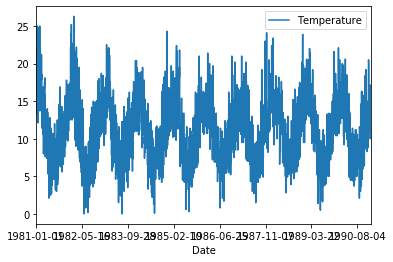

In [47]:
import matplotlib.pyplot as plt
df.plot()
plt.show()

### Get representation of the distribution of data using histogram
- use hist() method

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F4EB719B48>]],
      dtype=object)

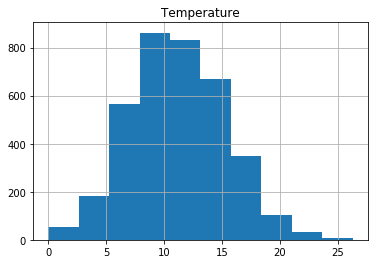

In [29]:
df.hist()

### Check minimum and maximum temperature
- use min() and max() methods

In [30]:
df.min()

Temperature    0.0
dtype: float64

In [31]:
df.max()

Temperature    26.3
dtype: float64

## Question 4

# Split the dataset into training and testing
- training data: 75%
- testing data: 25%

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
dataset = df.astype('float32')

In [34]:
dataset.head(n=1)

,Temperature
Date,
1981-01-01,20.700001


In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.layers import LSTM
from keras  import callbacks
from keras import optimizers

In [37]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(dataset)

In [38]:
print('Min', np.min(scaled))
print('Max', np.max(scaled))

Min 0.0
Max 1.0


In [39]:
print(scaled[:10])

[[0.7870723 ]
 [0.68060837]
 [0.71482889]
 [0.55513311]
 [0.60076048]
 [0.60076048]
 [0.60076048]
 [0.66159696]
 [0.82889733]
 [0.7604563 ]]


In [40]:
#Create the model
train_size = int(len(scaled) * 0.75)
test_size = len(scaled - train_size)
train, test = scaled[0:train_size, :], scaled[train_size: len(scaled), :]
print('train: {}\ntest: {}'.format(len(train), len(test)))

train: 2737
test: 913


In [41]:
def create_dataset(dataset, look_back=1):
    print(len(dataset), look_back)
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        print(i)
        print('X {} to {}'.format(i, i+look_back))
        print(a)
        print('Y {}'.format(i + look_back))
        print(dataset[i + look_back, 0])
        dataset[i + look_back, 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [42]:
look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

2737 1
0
X 0 to 1
[0.7870723]
Y 1
0.6806083702582986
1
X 1 to 2
[0.68060837]
Y 2
0.7148288890658444
2
X 2 to 3
[0.71482889]
Y 3
0.5551331104563756
3
X 3 to 4
[0.55513311]
Y 4
0.6007604809535642
4
X 4 to 5
[0.60076048]
Y 5
0.6007604809535642
5
X 5 to 6
[0.60076048]
Y 6
0.6007604809535642
6
X 6 to 7
[0.60076048]
Y 7
0.6615969628626882
7
X 7 to 8
[0.66159696]
Y 8
0.8288973334395067
8
X 8 to 9
[0.82889733]
Y 9
0.7604562958244149
9
X 9 to 10
[0.7604563]
Y 10
0.6159696286268815
10
X 10 to 11
[0.61596963]
Y 11
0.5057034439755123
11
X 11 to 12
[0.50570344]
Y 12
0.6349810360224919
12
X 12 to 13
[0.63498104]
Y 13
0.817490518011246
13
X 13 to 14
[0.81749052]
Y 14
0.9505703697805186
14
X 14 to 15
[0.95057037]
Y 15
0.7870722951873749
15
X 15 to 16
[0.7870723]
Y 16
0.7832699992037001
16
X 16 to 17
[0.78327]
Y 17
0.9429657778131689
17
X 17 to 18
[0.94296578]
Y 18
0.6730038508137127
18
X 18 to 19
[0.67300385]
Y 19
0.5893536292639215
19
X 19 to 20
[0.58935363]
Y 20
0.6920152582093231
20
X 20 to 21
[0.6

[0.3688213]
Y 231
0.4752851848902593
231
X 231 to 232
[0.47528518]
Y 232
0.2813688330811717
232
X 232 to 233
[0.28136883]
Y 233
0.3003802404767821
233
X 233 to 234
[0.30038024]
Y 234
0.1482889813118991
234
X 234 to 235
[0.14828898]
Y 235
0.2509505739959187
235
X 235 to 236
[0.25095057]
Y 236
0.17490494441347723
236
X 236 to 237
[0.17490494]
Y 237
0.26615970353854523
237
X 237 to 238
[0.2661597]
Y 238
0.22813688874732446
238
X 238 to 239
[0.22813689]
Y 239
0.2091254813517141
239
X 239 to 240
[0.20912548]
Y 240
0.30798481431344077
240
X 240 to 241
[0.30798481]
Y 241
0.2091254813517141
241
X 241 to 242
[0.20912548]
Y 242
0.23574144445329223
242
X 242 to 243
[0.23574144]
Y 243
0.30418251832976595
243
X 243 to 244
[0.30418252]
Y 244
0.39163499960185005
244
X 244 to 245
[0.391635]
Y 245
0.3726235922062397
245
X 245 to 246
[0.37262359]
Y 246
0.3650190365002719
246
X 246 to 247
[0.36501904]
Y 247
0.3231939257253763
247
X 247 to 248
[0.32319393]
Y 248
0.2851711109341556
248
X 248 to 249
[0.2851

Y 437
0.6539924434181024
437
X 437 to 438
[0.65399244]
Y 438
0.7300380730005438
438
X 438 to 439
[0.73003807]
Y 439
0.8441065173742061
439
X 439 to 440
[0.84410652]
Y 440
0.5969581849698893
440
X 440 to 441
[0.59695818]
Y 441
0.5399239627830582
441
X 441 to 442
[0.53992396]
Y 442
0.3726235922062397
442
X 442 to 443
[0.37262359]
Y 443
0.5323194070770905
443
X 443 to 444
[0.53231941]
Y 444
0.665399258846363
444
X 444 to 445
[0.66539926]
Y 445
0.7870722951873749
445
X 445 to 446
[0.7870723]
Y 446
0.5931559252475964
446
X 446 to 447
[0.59315593]
Y 447
0.5019011479918374
447
X 447 to 448
[0.50190115]
Y 448
0.5513308144727008
448
X 448 to 449
[0.55133081]
Y 449
0.638783259483403
449
X 449 to 450
[0.63878326]
Y 450
0.6539924434181024
450
X 450 to 451
[0.65399244]
Y 451
0.5095057036978052
451
X 451 to 452
[0.5095057]
Y 452
0.5399239627830582
452
X 452 to 453
[0.53992396]
Y 453
0.543726258766733
453
X 453 to 454
[0.54372626]
Y 454
0.3878327036181752
454
X 454 to 455
[0.3878327]
Y 455
0.39543725

[0.56653993]
Y 645
0.4068441110137856
645
X 645 to 646
[0.40684411]
Y 646
0.3269962217090512
646
X 646 to 647
[0.32699622]
Y 647
0.3574144445329222
647
X 647 to 648
[0.35741444]
Y 648
0.21673003705768185
648
X 648 to 649
[0.21673004]
Y 649
0.41444866671975333
649
X 649 to 650
[0.41444867]
Y 650
0.4980988882695445
650
X 650 to 651
[0.49809889]
Y 651
0.395437259324143
651
X 651 to 652
[0.39543726]
Y 652
0.3117870740357337
652
X 652 to 653
[0.31178707]
Y 653
0.3726235922062397
653
X 653 to 654
[0.37262359]
Y 654
0.2851711109341556
654
X 654 to 655
[0.28517111]
Y 655
0.2205323330413567
655
X 655 to 656
[0.22053233]
Y 656
0.3726235922062397
656
X 656 to 657
[0.37262359]
Y 657
0.3003802404767821
657
X 657 to 658
[0.30038024]
Y 658
0.3307984814313441
658
X 658 to 659
[0.33079848]
Y 659
0.38022814791220744
659
X 659 to 660
[0.38022815]
Y 660
0.40304185129149267
660
X 660 to 661
[0.40304185]
Y 661
0.30418251832976595
661
X 661 to 662
[0.30418252]
Y 662
0.3878327036181752
662
X 662 to 663
[0.387

X 842 to 843
[0.62737644]
Y 843
0.5361217030607652
843
X 843 to 844
[0.5361217]
Y 844
0.3992395553078178
844
X 844 to 845
[0.39923956]
Y 845
0.47908748087393416
845
X 845 to 846
[0.47908748]
Y 846
0.49429659228586964
846
X 846 to 847
[0.49429659]
Y 847
0.3307984814313441
847
X 847 to 848
[0.33079848]
Y 848
0.38403044389588226
848
X 848 to 849
[0.38403044]
Y 849
0.4562737774946489
849
X 849 to 850
[0.45627378]
Y 850
0.4752851848902593
850
X 850 to 851
[0.47528518]
Y 851
0.51330799968148
851
X 851 to 852
[0.513308]
Y 852
0.5209125553874479
852
X 852 to 853
[0.52091256]
Y 853
0.51330799968148
853
X 853 to 854
[0.513308]
Y 854
0.4068441110137856
854
X 854 to 855
[0.40684411]
Y 855
0.49429659228586964
855
X 855 to 856
[0.49429659]
Y 856
0.4410646660827134
856
X 856 to 857
[0.44106467]
Y 857
0.49429659228586964
857
X 857 to 858
[0.49429659]
Y 858
0.42585551840939595
858
X 858 to 859
[0.42585552]
Y 859
0.51330799968148
859
X 859 to 860
[0.513308]
Y 860
0.4904942963021948
860
X 860 to 861
[0.4

[0.55893537]
Y 1127
0.42205325868710303
1127
X 1127 to 1128
[0.42205326]
Y 1128
0.49429659228586964
1128
X 1128 to 1129
[0.49429659]
Y 1129
0.5931559252475964
1129
X 1129 to 1130
[0.59315593]
Y 1130
0.5399239627830582
1130
X 1130 to 1131
[0.53992396]
Y 1131
0.5893536292639215
1131
X 1131 to 1132
[0.58935363]
Y 1132
0.6844106662419733
1132
X 1132 to 1133
[0.68441067]
Y 1133
0.5703422218683112
1133
X 1133 to 1134
[0.57034222]
Y 1134
0.604562740675857
1134
X 1134 to 1135
[0.60456274]
Y 1135
0.5893536292639215
1135
X 1135 to 1136
[0.58935363]
Y 1136
0.6007604809535642
1136
X 1136 to 1137
[0.60076048]
Y 1137
0.6311787400388171
1137
X 1137 to 1138
[0.63117874]
Y 1138
0.5171102956651549
1138
X 1138 to 1139
[0.5171103]
Y 1139
0.5247148513711226
1139
X 1139 to 1140
[0.52471485]
Y 1140
0.5551331104563756
1140
X 1140 to 1141
[0.55513311]
Y 1141
0.5931559252475964
1141
X 1141 to 1142
[0.59315593]
Y 1142
0.6311787400388171
1142
X 1142 to 1143
[0.63117874]
Y 1143
0.543726258766733
1143
X 1143 to 114

0.42585551840939595
1403
X 1403 to 1404
[0.42585552]
Y 1404
0.34980988882695446
1404
X 1404 to 1405
[0.34980989]
Y 1405
0.3764258519285326
1405
X 1405 to 1406
[0.37642585]
Y 1406
0.4524714815109741
1406
X 1406 to 1407
[0.45247148]
Y 1407
0.5931559252475964
1407
X 1407 to 1408
[0.59315593]
Y 1408
0.7224334810331942
1408
X 1408 to 1409
[0.72243348]
Y 1409
0.4866920365799019
1409
X 1409 to 1410
[0.48669204]
Y 1410
0.46387833320061667
1410
X 1410 to 1411
[0.46387833]
Y 1411
0.4562737774946489
1411
X 1411 to 1412
[0.45627378]
Y 1412
0.42205325868710303
1412
X 1412 to 1413
[0.42205326]
Y 1413
0.4486692217886812
1413
X 1413 to 1414
[0.44866922]
Y 1414
0.28897338878713946
1414
X 1414 to 1415
[0.28897339]
Y 1415
0.49429659228586964
1415
X 1415 to 1416
[0.49429659]
Y 1416
0.4828897405962271
1416
X 1416 to 1417
[0.48288974]
Y 1417
0.6083650366595319
1417
X 1417 to 1418
[0.60836504]
Y 1418
0.5627376661623434
1418
X 1418 to 1419
[0.56273767]
Y 1419
0.5399239627830582
1419
X 1419 to 1420
[0.53992396

1624
X 1624 to 1625
[0.38403044]
Y 1625
0.2699619813915291
1625
X 1625 to 1626
[0.26996198]
Y 1626
0.29277566664012333
1626
X 1626 to 1627
[0.29277567]
Y 1627
0.3231939257253763
1627
X 1627 to 1628
[0.32319393]
Y 1628
0.2775665552281878
1628
X 1628 to 1629
[0.27756656]
Y 1629
0.2623574256855613
1629
X 1629 to 1630
[0.26235743]
Y 1630
0.3193916297417015
1630
X 1630 to 1631
[0.31939163]
Y 1631
0.2699619813915291
1631
X 1631 to 1632
[0.26996198]
Y 1632
0.23954374043696708
1632
X 1632 to 1633
[0.23954374]
Y 1633
0.022813689781266994
1633
X 1633 to 1634
[0.02281369]
Y 1634
0.06083650457248774
1634
X 1634 to 1635
[0.0608365]
Y 1635
0.26615970353854523
1635
X 1635 to 1636
[0.2661597]
Y 1636
0.31558937001940857
1636
X 1636 to 1637
[0.31558937]
Y 1637
0.30418251832976595
1637
X 1637 to 1638
[0.30418252]
Y 1638
0.3878327036181752
1638
X 1638 to 1639
[0.3878327]
Y 1639
0.40304185129149267
1639
X 1639 to 1640
[0.40304185]
Y 1640
0.395437259324143
1640
X 1640 to 1641
[0.39543726]
Y 1641
0.441064666

Y 1819
0.5057034439755123
1819
X 1819 to 1820
[0.50570344]
Y 1820
0.43726237009903857
1820
X 1820 to 1821
[0.43726237]
Y 1821
0.4106464069974604
1821
X 1821 to 1822
[0.41064641]
Y 1822
0.4562737774946489
1822
X 1822 to 1823
[0.45627378]
Y 1823
0.6197718520877926
1823
X 1823 to 1824
[0.61977185]
Y 1824
0.547528518489026
1824
X 1824 to 1825
[0.54752852]
Y 1825
0.4904942963021948
1825
X 1825 to 1826
[0.4904943]
Y 1826
0.5247148513711226
1826
X 1826 to 1827
[0.52471485]
Y 1827
0.40304185129149267
1827
X 1827 to 1828
[0.40304185]
Y 1828
0.47908748087393416
1828
X 1828 to 1829
[0.47908748]
Y 1829
0.5209125553874479
1829
X 1829 to 1830
[0.52091256]
Y 1830
0.47908748087393416
1830
X 1830 to 1831
[0.47908748]
Y 1831
0.4980988882695445
1831
X 1831 to 1832
[0.49809889]
Y 1832
0.5855513332802467
1832
X 1832 to 1833
[0.58555133]
Y 1833
0.4524714815109741
1833
X 1833 to 1834
[0.45247148]
Y 1834
0.5247148513711226
1834
X 1834 to 1835
[0.52471485]
Y 1835
0.547528518489026
1835
X 1835 to 1836
[0.547528

[0.37262359]
Y 2173
0.3231939257253763
2173
X 2173 to 2174
[0.32319393]
Y 2174
0.5589353701786686
2174
X 2174 to 2175
[0.55893537]
Y 2175
0.4562737774946489
2175
X 2175 to 2176
[0.45627378]
Y 2176
0.39163499960185005
2176
X 2176 to 2177
[0.391635]
Y 2177
0.4182509627034282
2177
X 2177 to 2178
[0.41825096]
Y 2178
0.3878327036181752
2178
X 2178 to 2179
[0.3878327]
Y 2179
0.47908748087393416
2179
X 2179 to 2180
[0.47908748]
Y 2180
0.4410646660827134
2180
X 2180 to 2181
[0.44106467]
Y 2181
0.3688212962225648
2181
X 2181 to 2182
[0.3688213]
Y 2182
0.5095057036978052
2182
X 2182 to 2183
[0.5095057]
Y 2183
0.3992395553078178
2183
X 2183 to 2184
[0.39923956]
Y 2184
0.5589353701786686
2184
X 2184 to 2185
[0.55893537]
Y 2185
0.5551331104563756
2185
X 2185 to 2186
[0.55513311]
Y 2186
0.5399239627830582
2186
X 2186 to 2187
[0.53992396]
Y 2187
0.5019011479918374
2187
X 2187 to 2188
[0.50190115]
Y 2188
0.4448669258050063
2188
X 2188 to 2189
[0.44486693]
Y 2189
0.6539924434181024
2189
X 2189 to 2190


0.19011407395610372
2336
X 2336 to 2337
[0.19011407]
Y 2337
0.1634981108545256
2337
X 2337 to 2338
[0.16349811]
Y 2338
0.24334601828995095
2338
X 2338 to 2339
[0.24334602]
Y 2339
0.4106464069974604
2339
X 2339 to 2340
[0.41064641]
Y 2340
0.2965779626237982
2340
X 2340 to 2341
[0.29657796]
Y 2341
0.3231939257253763
2341
X 2341 to 2342
[0.32319393]
Y 2342
0.3688212962225648
2342
X 2342 to 2343
[0.3688213]
Y 2343
0.38022814791220744
2343
X 2343 to 2344
[0.38022815]
Y 2344
0.4182509627034282
2344
X 2344 to 2345
[0.41825096]
Y 2345
0.3878327036181752
2345
X 2345 to 2346
[0.3878327]
Y 2346
0.2509505739959187
2346
X 2346 to 2347
[0.25095057]
Y 2347
0.23193916660030833
2347
X 2347 to 2348
[0.23193917]
Y 2348
0.2243346108943406
2348
X 2348 to 2349
[0.22433461]
Y 2349
0.33840303713731185
2349
X 2349 to 2350
[0.33840304]
Y 2350
0.49429659228586964
2350
X 2350 to 2351
[0.49429659]
Y 2351
0.47908748087393416
2351
X 2351 to 2352
[0.47908748]
Y 2352
0.2053232034987302
2352
X 2352 to 2353
[0.2053232]


0.42205325868710303
2709
X 2709 to 2710
[0.42205326]
Y 2710
0.47908748087393416
2710
X 2710 to 2711
[0.47908748]
Y 2711
0.3878327036181752
2711
X 2711 to 2712
[0.3878327]
Y 2712
0.42205325868710303
2712
X 2712 to 2713
[0.42205326]
Y 2713
0.3307984814313441
2713
X 2713 to 2714
[0.33079848]
Y 2714
0.3612167405165971
2714
X 2714 to 2715
[0.36121674]
Y 2715
0.3688212962225648
2715
X 2715 to 2716
[0.3688213]
Y 2716
0.3117870740357337
2716
X 2716 to 2717
[0.31178707]
Y 2717
0.19011407395610372
2717
X 2717 to 2718
[0.19011407]
Y 2718
0.24714829614293482
2718
X 2718 to 2719
[0.2471483]
Y 2719
0.46007607347832374
2719
X 2719 to 2720
[0.46007607]
Y 2720
0.33840303713731185
2720
X 2720 to 2721
[0.33840304]
Y 2721
0.23193916660030833
2721
X 2721 to 2722
[0.23193917]
Y 2722
0.10646387960234899
2722
X 2722 to 2723
[0.10646388]
Y 2723
0.14068441654058586
2723
X 2723 to 2724
[0.14068442]
Y 2724
0.25855514783257744
2724
X 2724 to 2725
[0.25855515]
Y 2725
0.2509505739959187
2725
X 2725 to 2726
[0.250950

144
X 144 to 145
[0.4904943]
Y 145
0.543726258766733
145
X 145 to 146
[0.54372626]
Y 146
0.5209125553874479
146
X 146 to 147
[0.52091256]
Y 147
0.46007607347832374
147
X 147 to 148
[0.46007607]
Y 148
0.4524714815109741
148
X 148 to 149
[0.45247148]
Y 149
0.4486692217886812
149
X 149 to 150
[0.44866922]
Y 150
0.4334600741153637
150
X 150 to 151
[0.43346007]
Y 151
0.39163499960185005
151
X 151 to 152
[0.391635]
Y 152
0.4448669258050063
152
X 152 to 153
[0.44486693]
Y 153
0.4562737774946489
153
X 153 to 154
[0.45627378]
Y 154
0.6615969628626882
154
X 154 to 155
[0.66159696]
Y 155
0.638783259483403
155
X 155 to 156
[0.63878326]
Y 156
0.6159696286268815
156
X 156 to 157
[0.61596963]
Y 157
0.49429659228586964
157
X 157 to 158
[0.49429659]
Y 158
0.4752851848902593
158
X 158 to 159
[0.47528518]
Y 159
0.47148288890658446
159
X 159 to 160
[0.47148289]
Y 160
0.6121673326432068
160
X 160 to 161
[0.61216733]
Y 161
0.7680608877917645
161
X 161 to 162
[0.76806089]
Y 162
0.543726258766733
162
X 162 to

[0.27376426]
Y 344
0.3269962217090512
344
X 344 to 345
[0.32699622]
Y 345
0.3346007774150189
345
X 345 to 346
[0.33460078]
Y 346
0.23574144445329223
346
X 346 to 347
[0.23574144]
Y 347
0.3612167405165971
347
X 347 to 348
[0.36121674]
Y 348
0.3878327036181752
348
X 348 to 349
[0.3878327]
Y 349
0.3688212962225648
349
X 349 to 350
[0.3688213]
Y 350
0.42585551840939595
350
X 350 to 351
[0.42585552]
Y 351
0.3878327036181752
351
X 351 to 352
[0.3878327]
Y 352
0.38403044389588226
352
X 352 to 353
[0.38403044]
Y 353
0.30798481431344077
353
X 353 to 354
[0.30798481]
Y 354
0.2509505739959187
354
X 354 to 355
[0.25095057]
Y 355
0.19011407395610372
355
X 355 to 356
[0.19011407]
Y 356
0.1787072222664611
356
X 356 to 357
[0.17870722]
Y 357
0.20152092564574633
357
X 357 to 358
[0.20152093]
Y 358
0.17110266656049333
358
X 358 to 359
[0.17110267]
Y 359
0.08745247220673862
359
X 359 to 360
[0.08745247]
Y 360
0.053231939801174494
360
X 360 to 361
[0.05323194]
Y 361
0.019011407395610372
361
X 361 to 362
[

[0.5361217]
Y 593
0.6577946668790133
593
X 593 to 594
[0.65779467]
Y 594
0.5969581849698893
594
X 594 to 595
[0.59695818]
Y 595
0.7072243696212586
595
X 595 to 596
[0.70722437]
Y 596
0.4828897405962271
596
X 596 to 597
[0.48288974]
Y 597
0.5323194070770905
597
X 597 to 598
[0.53231941]
Y 598
0.5209125553874479
598
X 598 to 599
[0.52091256]
Y 599
0.6197718520877926
599
X 599 to 600
[0.61977185]
Y 600
0.7604562958244149
600
X 600 to 601
[0.7604563]
Y 601
0.6463878514507526
601
X 601 to 602
[0.64638785]
Y 602
0.5779467775742789
602
X 602 to 603
[0.57794678]
Y 603
0.6273764440551423
603
X 603 to 604
[0.62737644]
Y 604
0.6273764440551423
604
X 604 to 605
[0.62737644]
Y 605
0.6577946668790133
605
X 605 to 606
[0.65779467]
Y 606
0.7262357770168689
606
X 606 to 607
[0.72623578]
Y 607
0.7338402964614549
607
X 607 to 608
[0.7338403]
Y 608
0.6577946668790133
608
X 608 to 609
[0.65779467]
Y 609
0.7224334810331942
609
X 609 to 610
[0.72243348]
Y 610
0.7528517038570652
610
X 610 to 611
[0.7528517]
Y

X 885 to 886
[0.65779467]
Y 886
0.7794677032200252
886
X 886 to 887
[0.7794677]
Y 887
0.7680608877917645
887
X 887 to 888
[0.76806089]
Y 888
0.7376425924451296
888
X 888 to 889
[0.73764259]
Y 889
0.5893536292639215
889
X 889 to 890
[0.58935363]
Y 890
0.5361217030607652
890
X 890 to 891
[0.5361217]
Y 891
0.4182509627034282
891
X 891 to 892
[0.41825096]
Y 892
0.42205325868710303
892
X 892 to 893
[0.42205326]
Y 893
0.5323194070770905
893
X 893 to 894
[0.53231941]
Y 894
0.4334600741153637
894
X 894 to 895
[0.43346007]
Y 895
0.4752851848902593
895
X 895 to 896
[0.47528518]
Y 896
0.5095057036978052
896
X 896 to 897
[0.5095057]
Y 897
0.5171102956651549
897
X 897 to 898
[0.5171103]
Y 898
0.5285171110934156
898
X 898 to 899
[0.52851711]
Y 899
0.6539924434181024
899
X 899 to 900
[0.65399244]
Y 900
0.5589353701786686
900
X 900 to 901
[0.55893537]
Y 901
0.5855513332802467
901
X 901 to 902
[0.58555133]
Y 902
0.4980988882695445
902
X 902 to 903
[0.49809889]
Y 903
0.5019011479918374
903
X 903 to 904


In [43]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)
print(X_test.shape)

(2735, 1, 1)
(911, 1, 1)


In [44]:
#The network has a visible layer with 1 input, a hidden layer with 4 LSTM blocks or neurons, and an output layer that makes a single value prediction. The default sigmoid activation function is used for the LSTM blocks. The network is trained for 100 epochs and a batch size of 1 is used.
#create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=10, batch_size=batch_size, verbose=2, shuffle=True)

Epoch 1/10
 - 11s - loss: 0.0212
Epoch 2/10
 - 11s - loss: 0.0110
Epoch 3/10
 - 12s - loss: 0.0100
Epoch 4/10
 - 11s - loss: 0.0102
Epoch 5/10
 - 12s - loss: 0.0101
Epoch 6/10
 - 12s - loss: 0.0100
Epoch 7/10
 - 12s - loss: 0.0101
Epoch 8/10
 - 12s - loss: 0.0099
Epoch 9/10
 - 12s - loss: 0.0100
Epoch 10/10
 - 12s - loss: 0.0099


In [45]:
import math
from sklearn.metrics import mean_squared_error

trainPredict = model.predict(X_train, batch_size=batch_size)
model.reset_states()

testPredict = model.predict(X_test, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 2.56 RMSE
Test Score: 2.47 RMSE


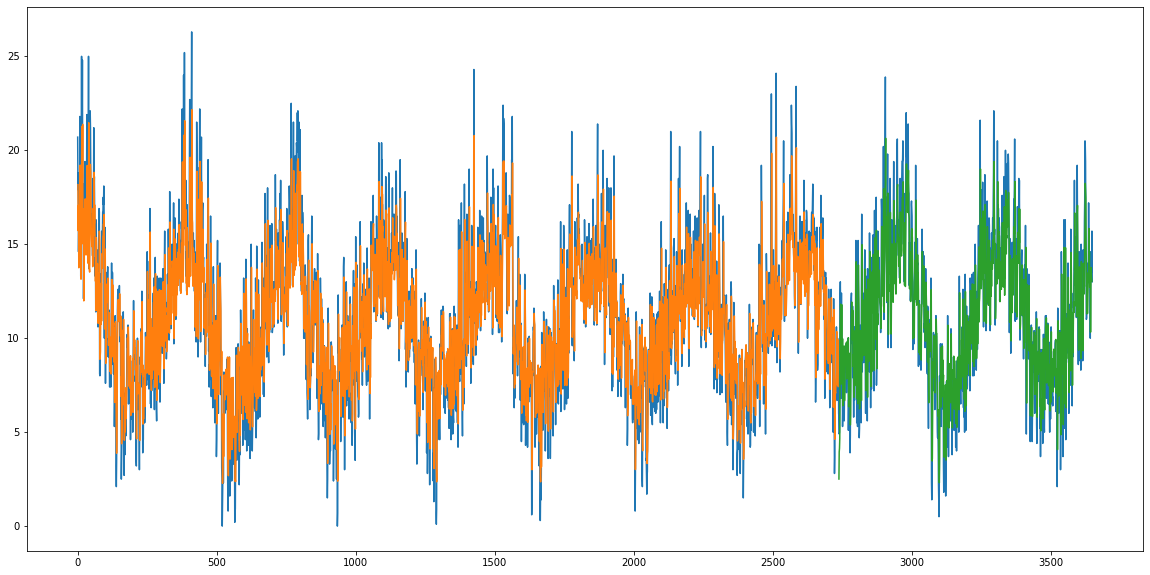

In [46]:
trainPredictPlot = np.empty_like(scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(scaled)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

### Normalize the data
- normalize temperature values using MinMaxScaler
- feature_range: 0-1
- fit MinMaxScaler on train data and transform it
  - use fit_transform() method
- transform test data using MinMaxScaler object
  - use transform() method

In [ ]:
#Done Above

### Print scaled train and test data
- print only first 5 values

In [ ]:
#Done above

## Question 5

### Create sequential data
Map the temperature at a particular day 'd' to the temperature at day t
'd+n', where n is any number you define.

For example: to map temperatures of consecutive days, use d+1, i.e. lookback = 1
- Below function takes data as input and returns sequential data.
- X as features and y as labels

In [2]:
import numpy as np
def create_seq_data(data, lookback=1):
  X, y = list(), list()
  
  for day in range((len(data)-lookback)):
    X.append(data[day: day+lookback, 0])
    y.append(data[day+lookback, 0])
  return np.array(X), np.array(y)

### Use the above function to create train and test sets
- Get X_train and y_train
- Get X_test and y_test
- lookback = 1

In [3]:
#Done

### Reshape the data
- Reshape X_train and X_test
- use np.reshape() method
- this is to be done to make the data ready for input in model

In [4]:
#Done

### Print shape of data
- print shape of X_train and X_test

In [5]:
#Done

## Question 6

### Define sequential model
- initialize a Sequential model
- add an LSTM layer
  - units: 10
  - stateful: True
  - pass a `batch_input_shape` argument to your layer
  - batch_input_shape: (batch_size, look_back, 1)
    - batch_size: 1
    - look_back: 1
- add Dense layer with 1 neuron

In [6]:
#Done

## Question 7

### compile your model
- loss: mean_squared_error
- optimizer: adam

In [7]:
#Done

### summarize your model
- use summary() method

In [8]:
#Done

## Question 8

### fit your model
- epochs: 50
- batch_size: 1

In [9]:
#Done

## Question 9

### make predictions on train data
- use predict() method
  - batch_size: 1
- store predictions in a variable

In [10]:
#Done

### reset model state
- if you are using stateful=True in your model then you should call reset_states every time, when you want to make consecutive model calls independent.
- use reset_states() method

In [11]:
#Done

### make predictions on test data
- use predict() method
  - batch_size: 1
- store predictions in a variable

In [12]:
#Done

## Question 10

### Inverse train predictions and true labels
- use your MinMaxSclarer object
- use inverse_transform() method

In [13]:
#Done

### Inverse test predictions and true labels
- use your MinMaxSclarer object
- use inverse_transform() method

In [14]:
#Done

### Evaluate train predictions
- calculate RMSE
- RMSE = sqrt(mean_squared_error(true_labels, predicted_labels))
- use sqrt() and mean_squared_error() method
- print training RMSE

### Evaluate test predictions
- calculate RMSE
- RMSE = sqrt(mean_squared_error(true_labels, predicted_labels))
- use sqrt() and mean_squared_error() method
- print testing RMSE

In [15]:
#Done